In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import random
from utils import plot_samples_with_labels, classify, plot_conf_matrix

### Load and prepare data

In [2]:
# Download the MNIST dataset (handwritten digit images with labels)
mnist = keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
training_images = training_images / 255.0
test_images = test_images / 255.0

# Reshape the data to include a channel dimension
training_images = training_images.reshape(training_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

### Build the model

In [4]:
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Second convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    
    # Fourth convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    
    # Flattening the 3D output to 1D before feeding it into the dense layer
    layers.Flatten(),
    
    # Dense layers for classification
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # For 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary to see the architecture and parameters
model.summary()

c:\Users\Paula\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 1, 1, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,058 (101.79 KB)

 Trainable params: 26,058 (101.79 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

### Train the model

In [6]:
BATCH_SIZE = 32
num_training_images = training_images.shape[0]
num_epochs = 10

history = model.fit(
    training_images, training_labels,
    epochs= num_epochs,
    batch_size=BATCH_SIZE,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8457 - loss: 0.4849 - val_accuracy: 0.9711 - val_loss: 0.0855
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9772 - loss: 0.0726 - val_accuracy: 0.9862 - val_loss: 0.0433
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9851 - loss: 0.0478 - val_accuracy: 0.9868 - val_loss: 0.0402
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9885 - loss: 0.0374 - val_accuracy: 0.9903 - val_loss: 0.0309
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9909 - loss: 0.0287 - val_accuracy: 0.9913 - val_loss: 0.0302
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9922 - loss: 0.0246 - val_accuracy: 0.9911 - val_loss: 0.0343
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9925 - loss: 0.0226 - val_accuracy: 0.9913 - val_loss: 0.0307
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9937 - loss: 0

In [7]:
model.save('models/digit_CNN.h5')

In [8]:
num_epochs = 10

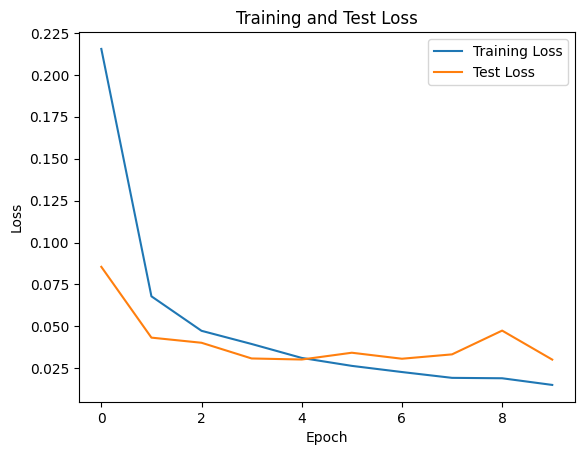

In [9]:
# Save the metrics.
metrics = history.history
# Save the loss values.
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']
# Plot the training and test loss.
x = np.arange(0, num_epochs, 1)
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss_list, label='Training Loss')
plt.plot(x, test_loss_list, label='Test Loss')
plt.legend()
plt.show()

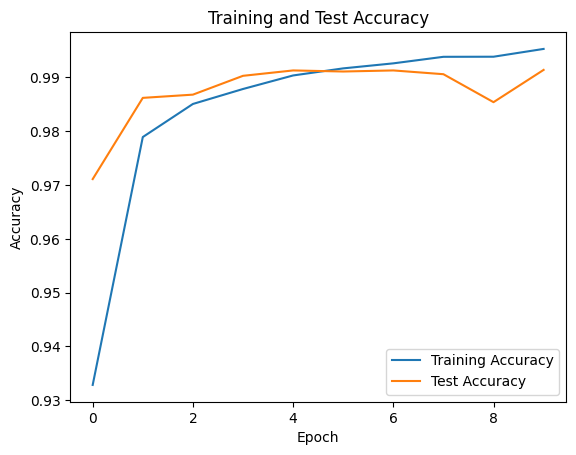

In [10]:
train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy_list, label='Training Accuracy')
plt.plot(x, test_accuracy_list, label='Test Accuracy')
plt.legend()
plt.show()

### Using the model to classify new images

In [12]:
from tensorflow.keras.models import load_model
model_cnn = load_model('models/digit_CNN.h5')

In [13]:
predicted_labels = classify(test_images, model_cnn)
predicted_labels = np.array(predicted_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [14]:
from sklearn.metrics import classification_report, accuracy_score
# Calculate metrics
print("Accuracy:", accuracy_score(test_labels, predicted_labels))
print("\nClassification Report:\n")
print(classification_report(test_labels, predicted_labels))

Accuracy: 0.9914

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



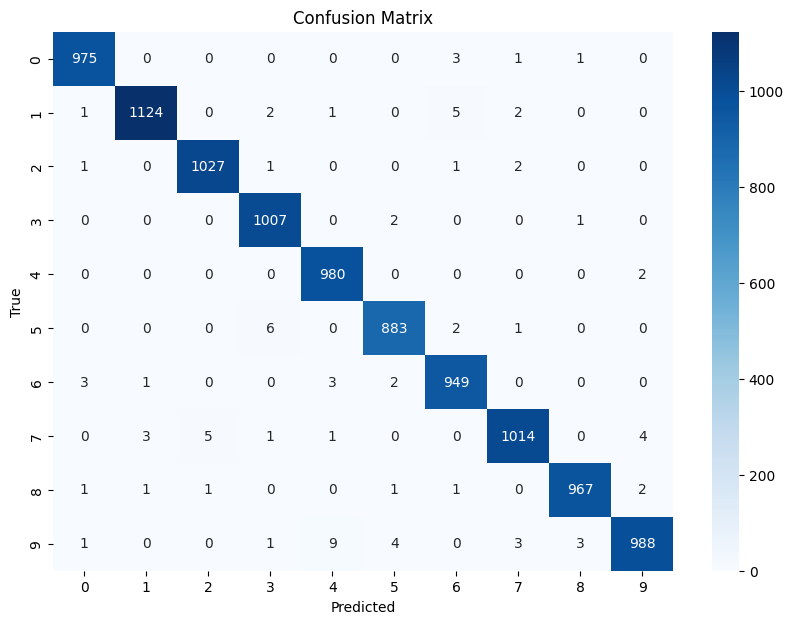

In [15]:
# Generate confusion matrix
plot_conf_matrix(test_labels, predicted_labels)

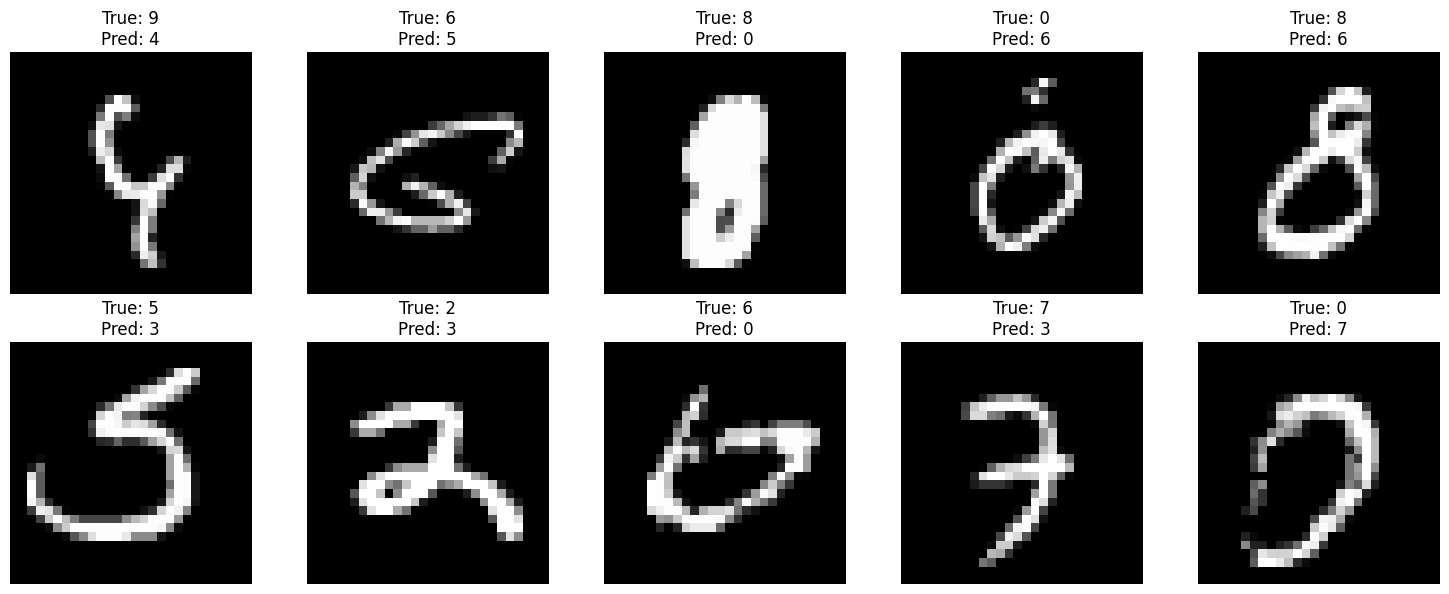

In [16]:
# Visualize some misclassified images

misclassified_indices = (test_labels != predicted_labels)
misclassified_images = test_images[misclassified_indices]
misclassified_true_labels = test_labels[misclassified_indices]
misclassified_predicted_labels = predicted_labels [misclassified_indices]

if len(misclassified_images) > 0:
    plot_samples_with_labels(misclassified_images, misclassified_true_labels, misclassified_predicted_labels, num_samples = 10, randomize= True)
else:
    print("No misclassified images found in the selected batch.")

In [19]:
print(len(misclassified_images))

86
